**Business Case:** To predict the risky driver who is more likely to claim the insurance.

Dataset description:
'target' is the dependent feature and the rest 58 are the independent features.
In this dataset, features belonging to similar group are tagged with similar feature names. such as (ind,reg,car,calc)

Here,
*ind*: is related to individual or driver,
*reg*: is related to region
*car*: is related to car
*calc*: is an calculated feature.

Also, the features contain a postfix such as '*bin*' and '*cat*' which represents binary and categorical features respectively and the rest of the feature are either continuous or ordinal.



In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing and reading the dataset
data=pd.read_csv(r"C:\Users\HP\Downloads\PRCP-1010-InsClaimPred\Data\train.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


**Performing Basic checks to understand the data**

In [ ]:
data.shape #performing basic checks to understand the data

(595212, 59)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
data.memory_usage(deep='True')

Index                 128
id                4761696
target            4761696
ps_ind_01         4761696
ps_ind_02_cat     4761696
ps_ind_03         4761696
ps_ind_04_cat     4761696
ps_ind_05_cat     4761696
ps_ind_06_bin     4761696
ps_ind_07_bin     4761696
ps_ind_08_bin     4761696
ps_ind_09_bin     4761696
ps_ind_10_bin     4761696
ps_ind_11_bin     4761696
ps_ind_12_bin     4761696
ps_ind_13_bin     4761696
ps_ind_14         4761696
ps_ind_15         4761696
ps_ind_16_bin     4761696
ps_ind_17_bin     4761696
ps_ind_18_bin     4761696
ps_reg_01         4761696
ps_reg_02         4761696
ps_reg_03         4761696
ps_car_01_cat     4761696
ps_car_02_cat     4761696
ps_car_03_cat     4761696
ps_car_04_cat     4761696
ps_car_05_cat     4761696
ps_car_06_cat     4761696
ps_car_07_cat     4761696
ps_car_08_cat     4761696
ps_car_09_cat     4761696
ps_car_10_cat     4761696
ps_car_11_cat     4761696
ps_car_11         4761696
ps_car_12         4761696
ps_car_13         4761696
ps_car_14   

In [ ]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [ ]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.1 MB/s 


**Univariate Analysis**

In [ ]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights from univariate analysis:**:

*   Target variable has two class 0 & 1, and 99 percent of data is 0 and rest 1 percent belongs to class 1.
*   ps_ind_02_cat has 4 distinct classes 1,2,3,4 and class 1 has over 60 percent of datapoints.
*   ps_ind_04_cat has 2 classes.
*   ps_ind_05_cat has 8 distinct classes and class 0 contains over 80 percent of datapoints.
ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin,
*   ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin are binary features, hence, these features have 2 classes- 0 & 1, for most of the features class 0 contains major percentage of datapoints.
*   ps_reg_01, ps_reg_02, ps_reg_03 are the features which contain continuous numerical data. (float)
*   ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_calc_05, ps_calc_09, are categorical columns which contains more than 3 categories.
*   ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin contains 2 classes 0 & 1.










In [4]:
#creating a dataframe to store the mete-information about the variables for easier datamanagement while performing analysis and visualizations.
df = []
for f in data.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'

    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif data[f].dtype == float:
        level = 'interval'
    elif data[f].dtype == int:
        level = 'ordinal'

    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False

    # Defining the data type
    dtype = data[f].dtype

    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    df.append(f_dict)

meta = pd.DataFrame(df, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [5]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,binary,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,nominal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [6]:
meta[(meta.level== 'nominal') & (meta.keep==True)].index

Index(['ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11'],
      dtype='object', name='varname')

In [7]:
data_interval=meta[(meta.level=='interval') & (meta.keep==True)].index
data_interval

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

In [8]:
data[data_interval].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,...,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,...,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [9]:
np.std(data[data_interval])<0.1

ps_reg_01     False
ps_reg_02     False
ps_reg_03     False
ps_car_12      True
ps_car_13     False
ps_car_14     False
ps_car_15     False
ps_calc_01    False
ps_calc_02    False
ps_calc_03    False
ps_calc_04    False
ps_calc_05    False
ps_calc_06    False
ps_calc_07    False
ps_calc_08    False
ps_calc_09    False
ps_calc_10    False
ps_calc_11    False
ps_calc_12    False
ps_calc_13    False
ps_calc_14    False
dtype: bool

**Handling missing values**

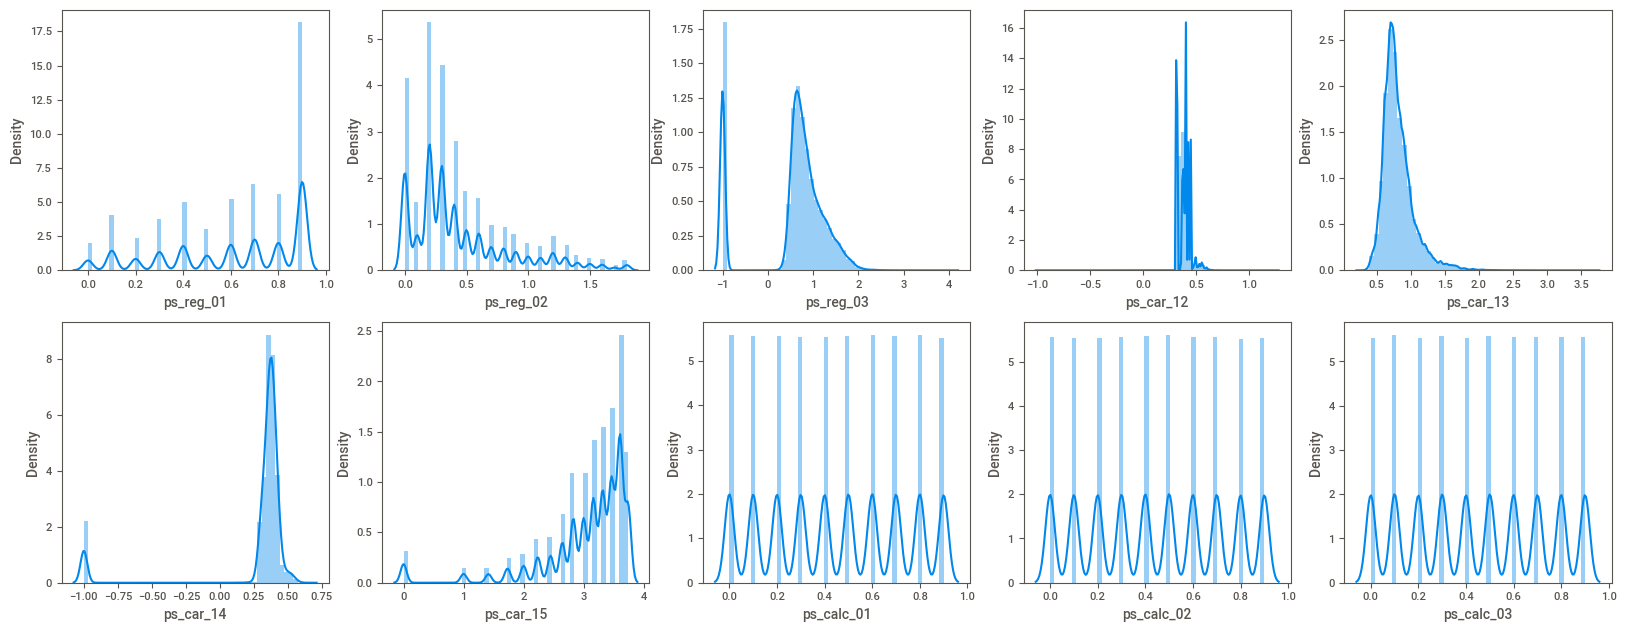

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
    ax=plt.subplot(5,5,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

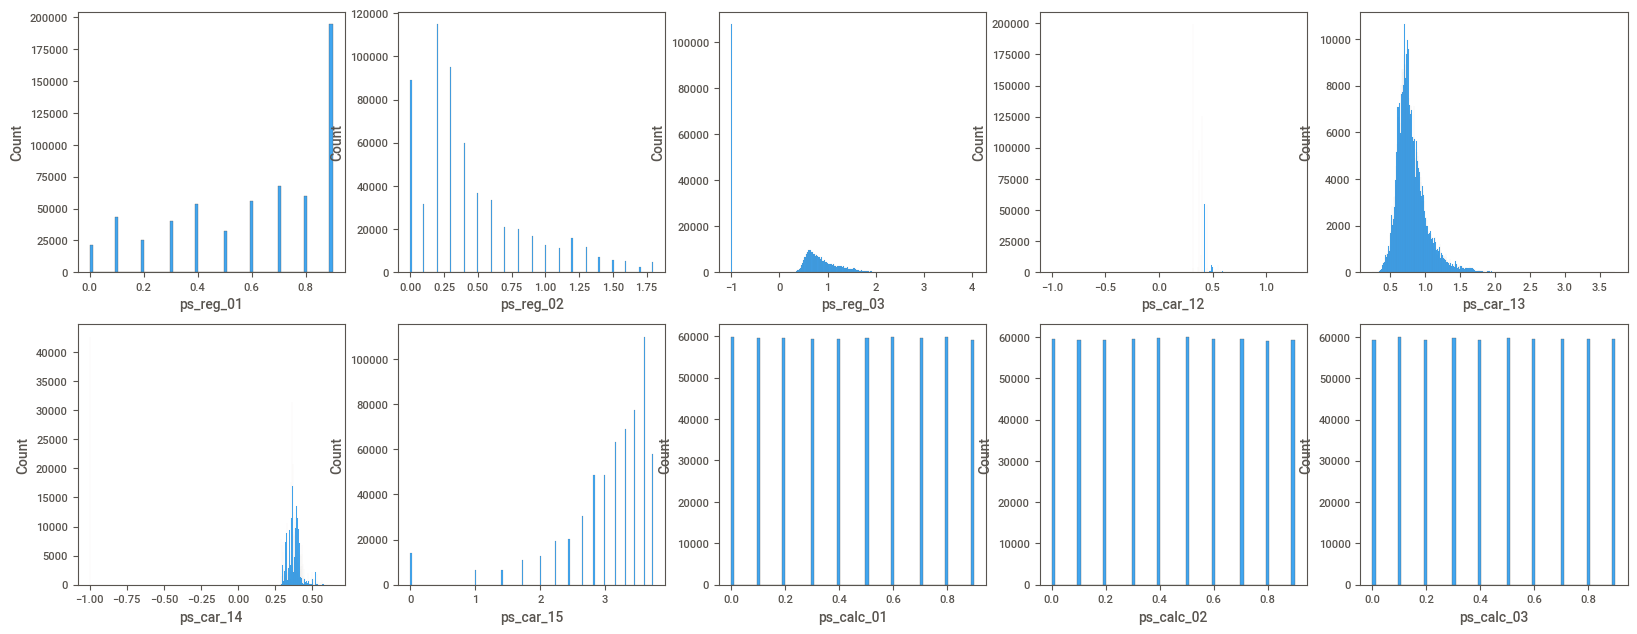

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
    ax=plt.subplot(5,5,plotnumber)
    sns.histplot(data[i])
    plotnumber+=1
plt.show()

It appears there are some missing values in the ps_reg_03 ps_car_12, ps_car_14 features. (these features have -1 value which seems to be a missing value)

In [ ]:
data['ps_reg_03'].value_counts()

-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 1.397990         1
 0.215058         1
 1.620764         1
 1.967073         1
 1.743560         1
Name: ps_reg_03, Length: 5013, dtype: int64

In [ ]:
print(107772/595212*100)

18.106489788512327


In [ ]:
data.loc[data['ps_reg_03']<0].shape

(107772, 59)

In [ ]:
data['ps_reg_03'].mean()

0.5511018410425681

In [ ]:
data['ps_reg_03'].median()

0.7206767653

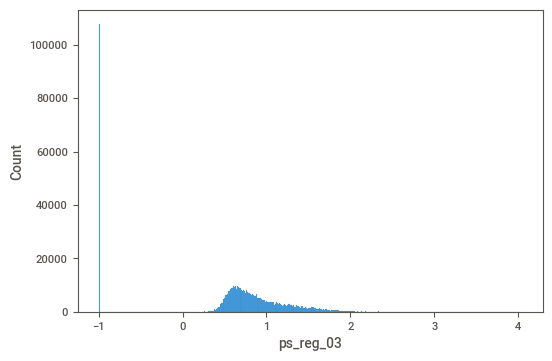

In [ ]:
sns.histplot(data['ps_reg_03'])
plt.show()

In [10]:
#checking for missing values in all the features
vars_with_missing = []

for i in data.columns:
    missings = data[data[i] == -1][i].count()
    if missings > 0:
        vars_with_missing.append(i)
        missings_perc = missings/data.shape[0]

        print('Variable {} has {} records ({:.2%}) with missing values'.format(i, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 11 variables with missing values


*   Features ps_car_03_cat and ps_car_05_cat has around 50 percent of missing values. Hence, it is ideal to drop these features.
*   ps_reg_03 has 18 percent of missing values. This is a continuous variable. We can impute the missing values in this feature with mean.
*   ps_car_11 and ps_car_12 has 5 & 1 missing records respectively. ps_car_11 is ordinal and ps_car_12 is continouous, so, we can replace these missing records with mode and mean respectively.
*   ps_car_14 has 7 percent missing records. This is continouous variable. So, we can replace the missing values with mean.
*   Rest of the features which contain missing values are categorical. We can replace these with mode.

In [11]:
#dropping features
data.drop(['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True) #dropping features with more missing records
meta.loc[['ps_car_03_cat','ps_car_05_cat'],'keep']=False #removing the features from meta data

KeyError: "['ps_car_03_cat', 'ps_car_05_cat'] not found in axis"

In [ ]:
data[data['ps_car_12']<0]

In [ ]:
data['ps_car_14'].value_counts()

-1.000000    42620
 0.361525    17696
 0.358329    15523
 0.361939    11885
 0.368782    11626
             ...  
 0.526783        1
 0.213073        1
 0.603324        1
 0.411461        1
 0.511371        1
Name: ps_car_14, Length: 850, dtype: int64

In [12]:
data.loc[data['ps_car_14']==-1,'ps_car_14']=data['ps_car_14'].mean()#replacing missing values in ps_car_14 with mean
data['ps_car_14'].value_counts()

ps_car_14
0.276256    42620
0.361525    17696
0.358329    15523
0.361939    11885
0.368782    11626
            ...  
0.526783        1
0.213073        1
0.603324        1
0.411461        1
0.511371        1
Name: count, Length: 850, dtype: int64

In [13]:
data.loc[data['ps_reg_03']==-1,'ps_reg_03']=data['ps_reg_03'].mean()#replacing missing values in ps_reg_03 with mean
data.loc[data['ps_car_12']==-1,'ps_car_12']=data['ps_car_12'].mean()#replacing missing values in ps_car_12 with mean
data.loc[data['ps_car_11']==-1,'ps_car_11']=data['ps_car_11'].mean()#replacing missing values in ps_car_11 with mean

In [14]:
data.loc[data['ps_car_02_cat']==-1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
93772,234713,0,0,1,3,1,0,0,1,0,...,3,1,4,4,0,0,1,0,0,0
167288,418027,0,0,1,1,0,3,1,0,0,...,3,0,0,9,0,1,1,1,0,0
514764,1286199,0,5,1,6,0,0,0,0,0,...,5,3,2,13,0,0,0,1,0,0
547614,1368555,0,1,1,7,0,0,0,0,1,...,8,1,2,14,0,1,1,0,1,0
578003,1445211,0,5,1,8,0,4,1,0,0,...,5,0,1,9,0,1,1,0,0,0


In [15]:

data.loc[data['ps_car_02_cat']==-1,'ps_car_02_cat']=int(data['ps_car_02_cat'].mode())#replacing missing values in ps_car_02_cat with mode
data['ps_car_02_cat'].value_counts()

ps_car_02_cat
1    493995
0    101217
Name: count, dtype: int64

In [16]:
data.loc[data['ps_ind_02_cat']==-1,'ps_ind_02_cat']=int(data['ps_ind_02_cat'].mode())#replacing missing values in ps_ind_02_cat with mode

#Variable ps_ind_04_cat has 83 records (0.01%) with missing values
#Variable ps_ind_05_cat has 5809 records (0.98%) with missing values

In [17]:
data.loc[data['ps_ind_04_cat']==-1,'ps_ind_04_cat']=int(data['ps_ind_04_cat'].mode())#replacing missing values in ps_ind_04_cat with mode
data.loc[data['ps_ind_05_cat']==-1,'ps_ind_05_cat']=int(data['ps_ind_05_cat'].mode())#replacing missing values in ps_ind_05_cat with mode

In [18]:
data['ps_ind_04_cat'].value_counts()

ps_ind_04_cat
0    347048
1    248164
Name: count, dtype: int64

In [19]:
print(data['ps_car_01_cat'].value_counts())
print(data['ps_car_07_cat'].value_counts())
print(data['ps_car_09_cat'].value_counts())

ps_car_01_cat
 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: count, dtype: int64
ps_car_07_cat
 1    553148
 0     30575
-1     11489
Name: count, dtype: int64
ps_car_09_cat
 2    353482
 0    194518
 1     29080
 3     14756
 4      2807
-1       569
Name: count, dtype: int64


In [20]:
data.loc[data['ps_car_01_cat']==-1,'ps_car_01_cat']=int(data['ps_car_01_cat'].mode())#replacing missing values in ps_car_01_cat with mode
data.loc[data['ps_car_07_cat']==-1,'ps_car_07_cat']=int(data['ps_car_07_cat'].mode())#replacing missing values in ps_car_07_cat with mode
data.loc[data['ps_car_09_cat']==-1,'ps_car_09_cat']=int(data['ps_car_09_cat'].mode())#replacing missing values in ps_car_09_cat with mode

In [21]:
print(data['ps_car_01_cat'].value_counts())
print(data['ps_car_07_cat'].value_counts())
print(data['ps_car_09_cat'].value_counts())

ps_car_01_cat
11    207680
7     179247
6      62393
10     50087
4      26174
9      20323
5      18142
8      15093
3       6658
0       5904
2       2144
1       1367
Name: count, dtype: int64
ps_car_07_cat
1    564637
0     30575
Name: count, dtype: int64
ps_car_09_cat
2    354051
0    194518
1     29080
3     14756
4      2807
Name: count, dtype: int64


**Bivariate Analysis**

In [ ]:
data_nominal=meta[(meta.level=='nominal') & (meta.keep==True)].index
data_nominal

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [ ]:
data[data_nominal].describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.359668,0.416934,0.414948,8.298090,0.829948,0.725192,6.555340,0.948632,0.832080,1.331757,0.992136,62.215674
std,0.663108,0.493052,1.344050,2.505433,0.375679,2.153463,5.501445,0.220748,0.373796,0.976311,0.091619,33.012455
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,0.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,9.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [ ]:
np.std(data[data_nominal])<0.1

ps_ind_02_cat    False
ps_ind_04_cat    False
ps_ind_05_cat    False
ps_car_01_cat    False
ps_car_02_cat    False
ps_car_04_cat    False
ps_car_06_cat    False
ps_car_07_cat    False
ps_car_08_cat    False
ps_car_09_cat    False
ps_car_10_cat     True
ps_car_11_cat    False
dtype: bool

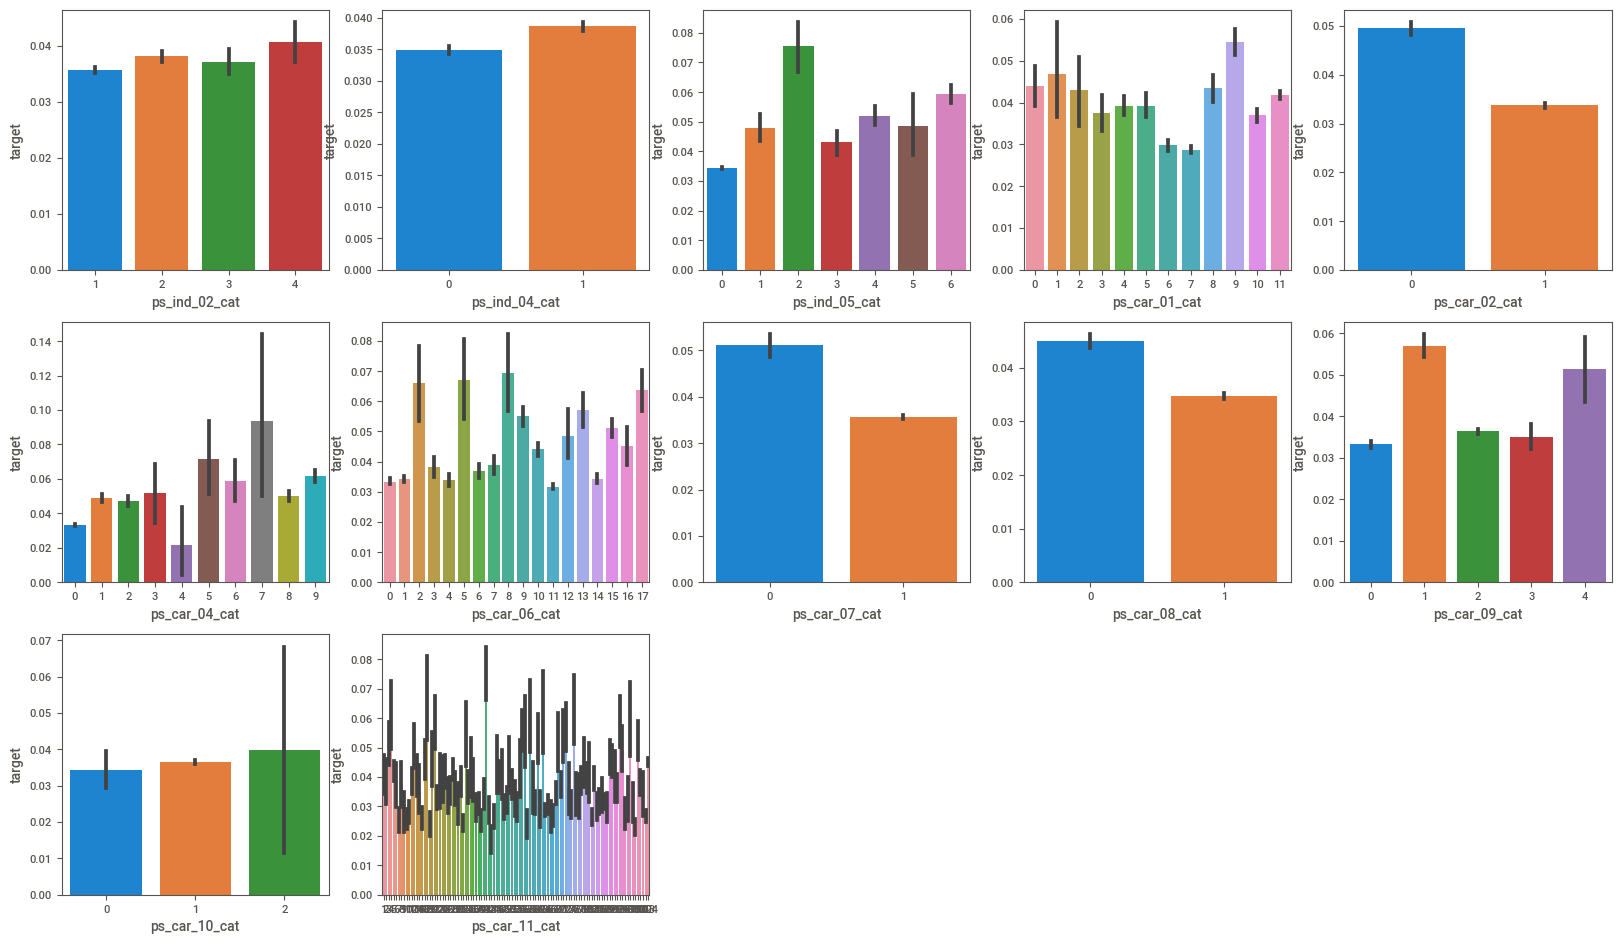

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
    ax=plt.subplot(5,5,plotnumber)
    sns.barplot(data[i],data['target'])
    plotnumber+=1
plt.show()

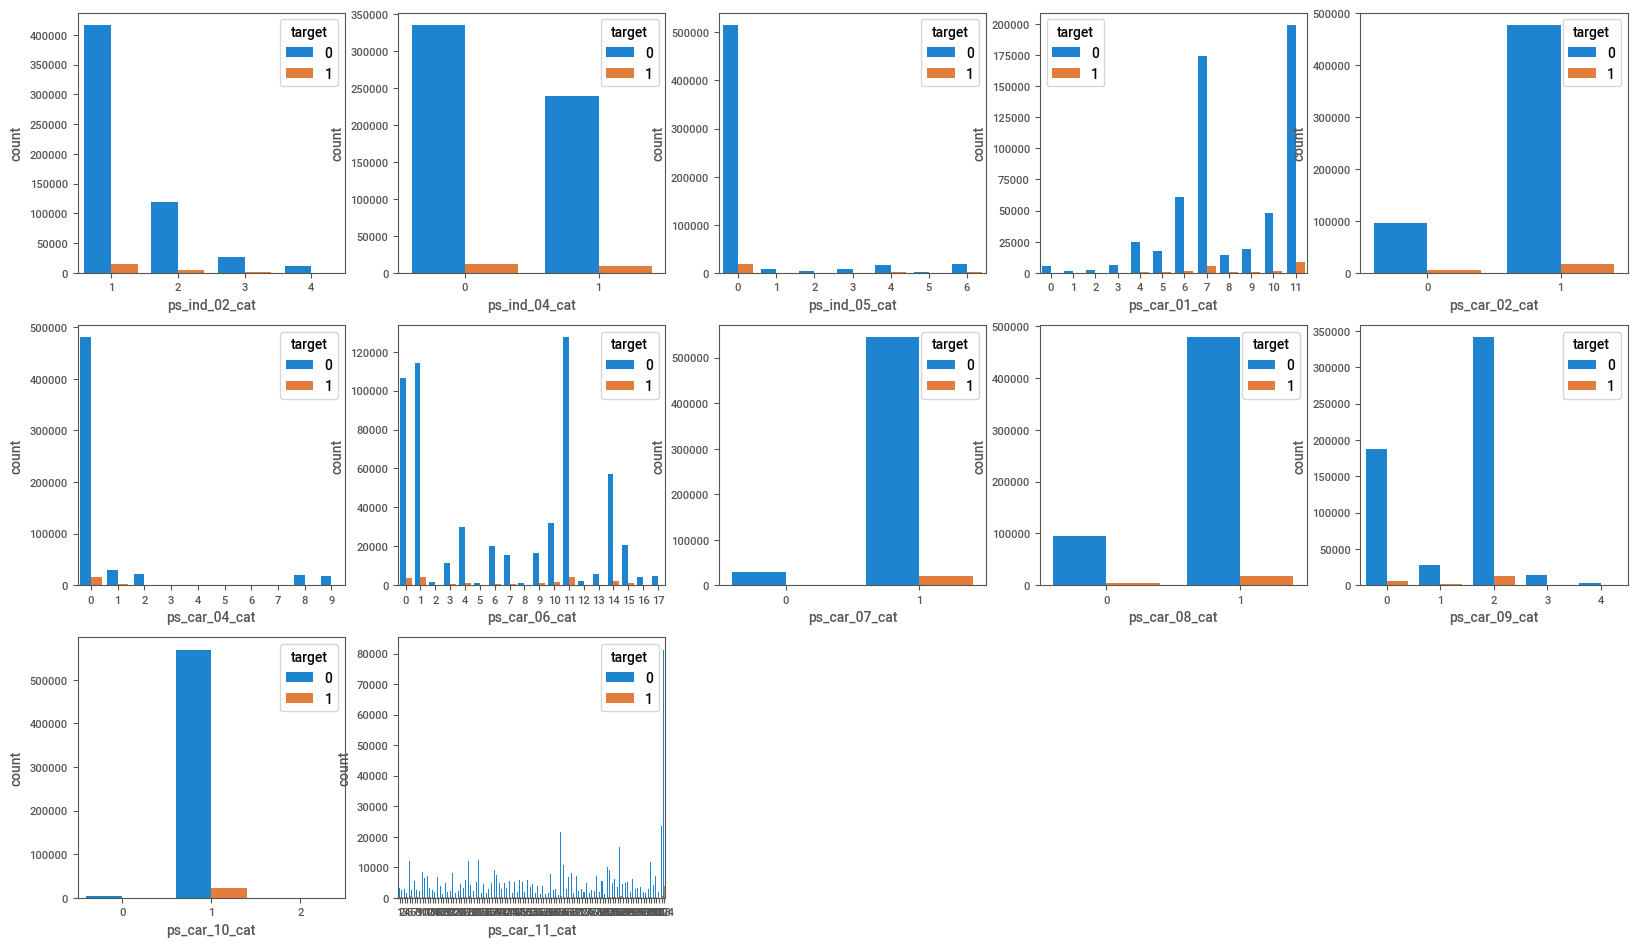

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
    ax=plt.subplot(5,5,plotnumber)
    sns.countplot(x=data[i],hue=data['target'])
    plotnumber+=1
plt.show()

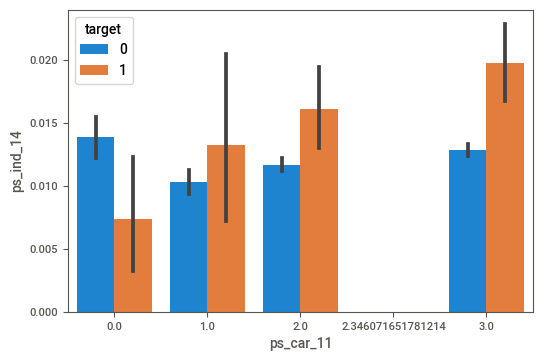

In [ ]:
sns.barplot(x=data['ps_car_11'],y=data['ps_ind_14'],hue=data['target'])
plt.show()

In [ ]:
data_bin=meta[(meta.level=='binary') & (meta.keep)].index
data_bin

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object', name='varname')

In [ ]:
data[data_bin].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np.std(data[data_bin])<0.1

target            False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin      True
ps_ind_11_bin      True
ps_ind_12_bin      True
ps_ind_13_bin      True
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_calc_15_bin    False
ps_calc_16_bin    False
ps_calc_17_bin    False
ps_calc_18_bin    False
ps_calc_19_bin    False
ps_calc_20_bin    False
dtype: bool

In [ ]:
np.std(data[data_interval])<0.1

ps_reg_01     False
ps_reg_02     False
ps_reg_03     False
ps_car_12      True
ps_car_13     False
ps_car_14      True
ps_car_15     False
ps_calc_01    False
ps_calc_02    False
ps_calc_03    False
dtype: bool

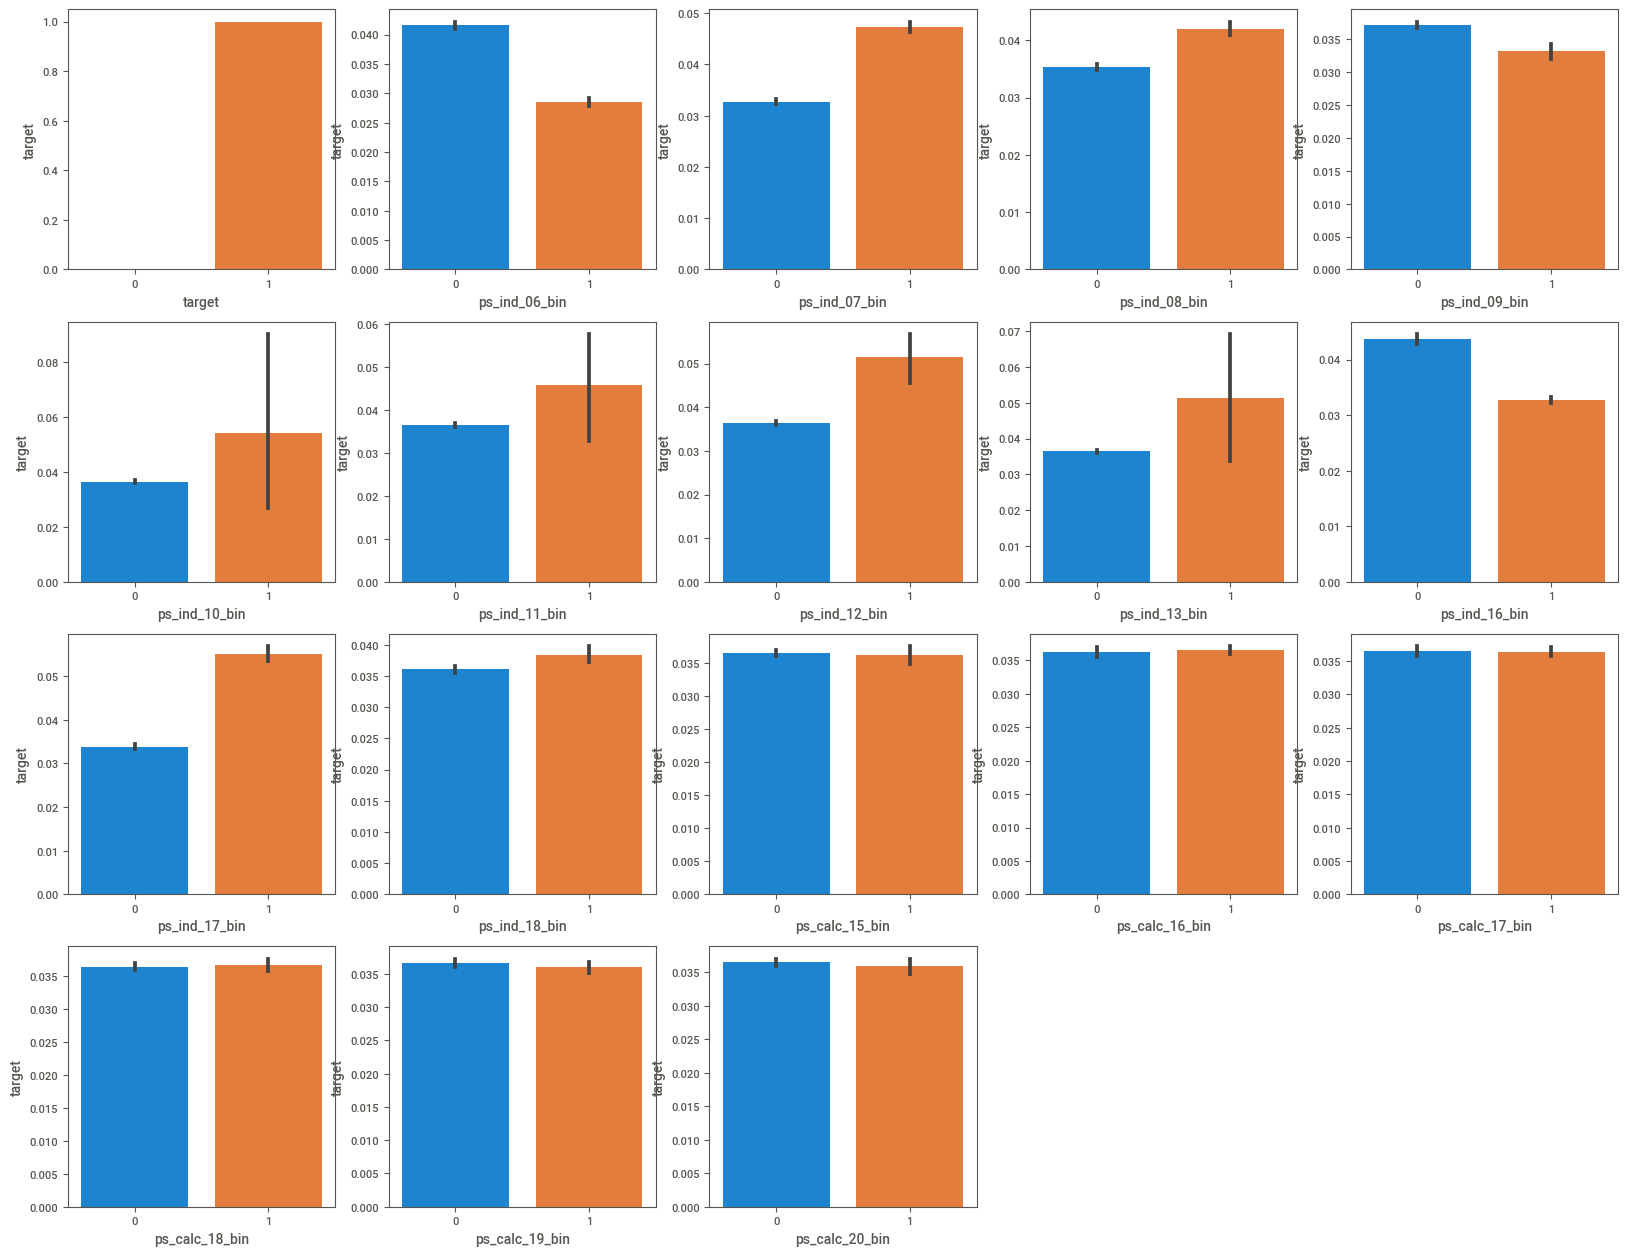

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_bin:
  ax=plt.subplot(5,5,plotnumber)
  sns.barplot(data[i],data['target'])
  plotnumber+=1
plt.show()

In [ ]:
#checking for outliers in the data

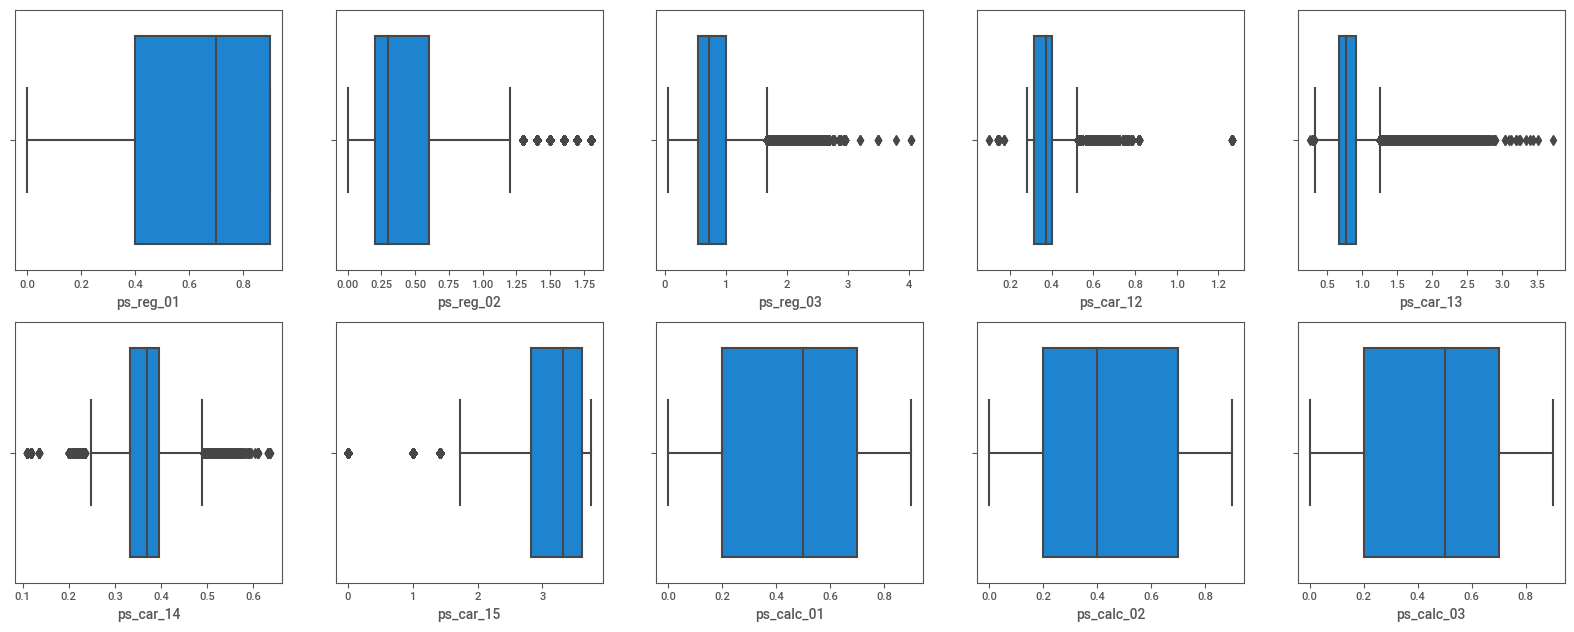

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_interval:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

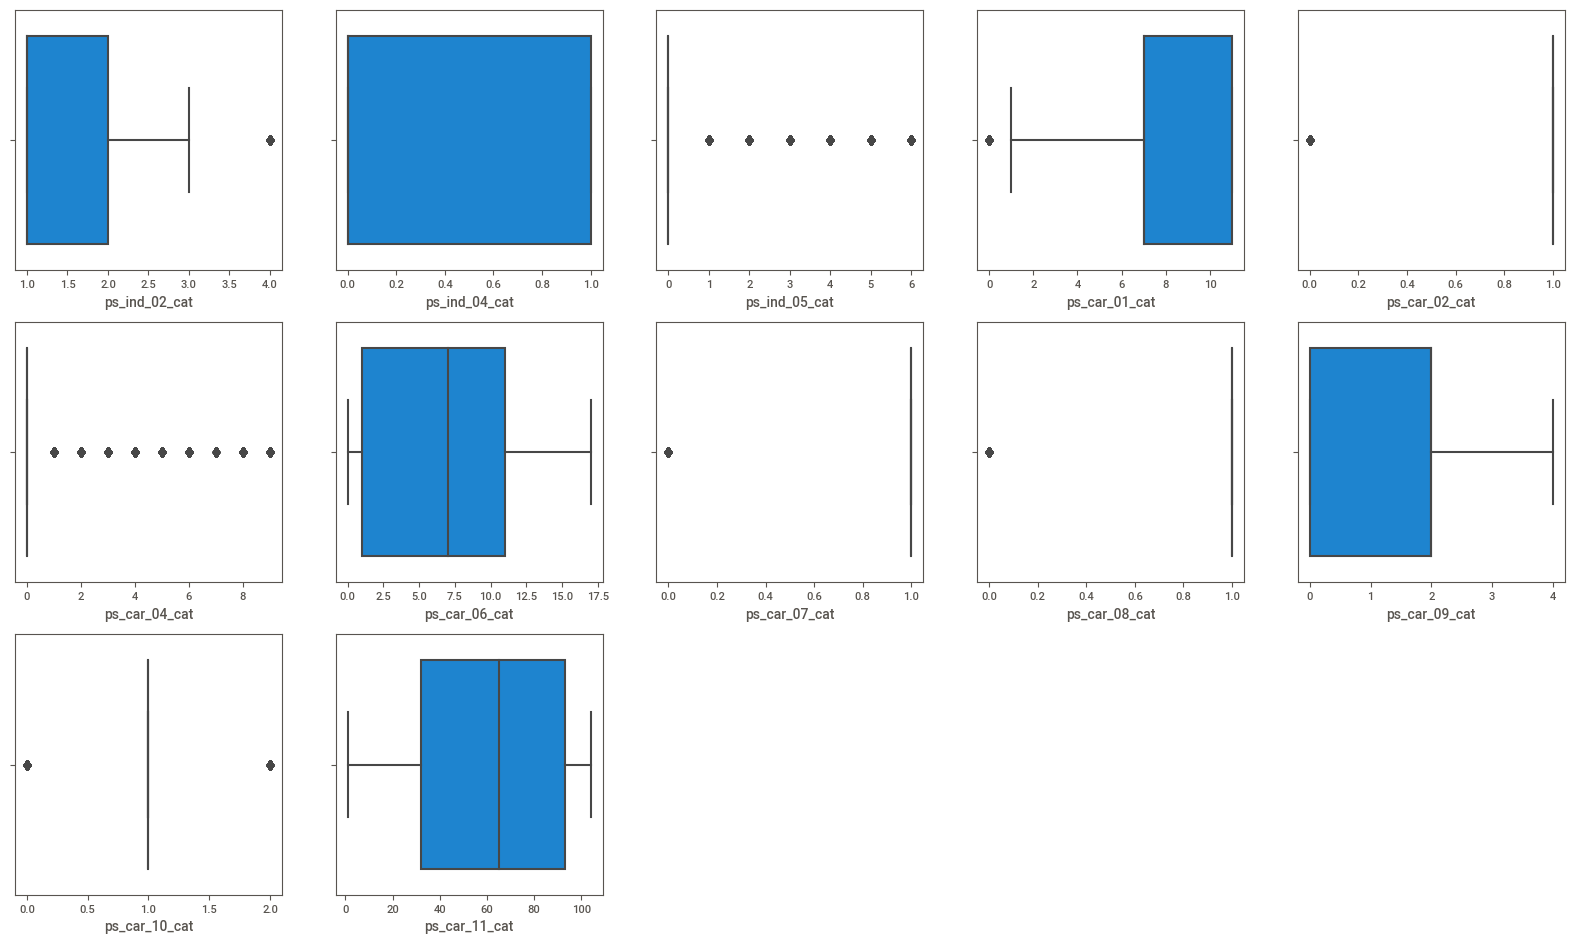

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_nominal:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

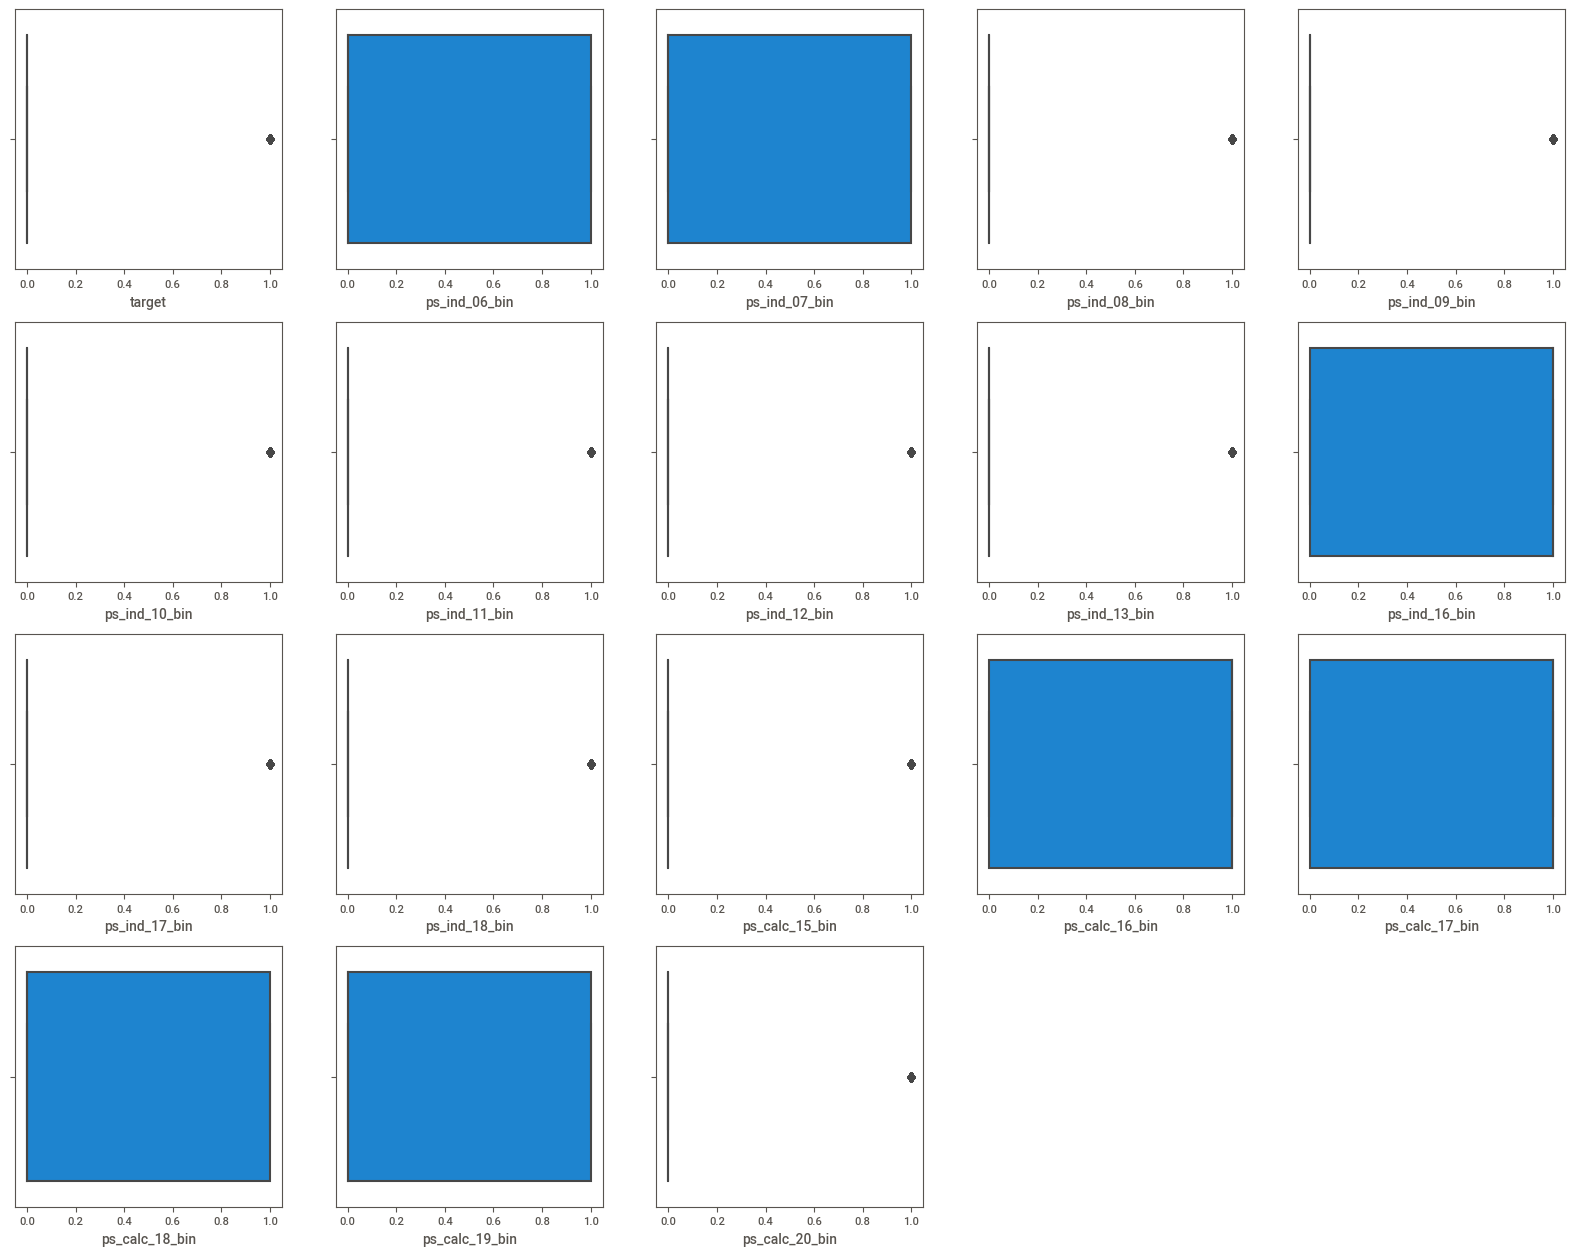

In [ ]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data_bin:
  ax=plt.subplot(5,5,plotnumber)
  sns.boxplot(data[i])
  plotnumber+=1
plt.show()

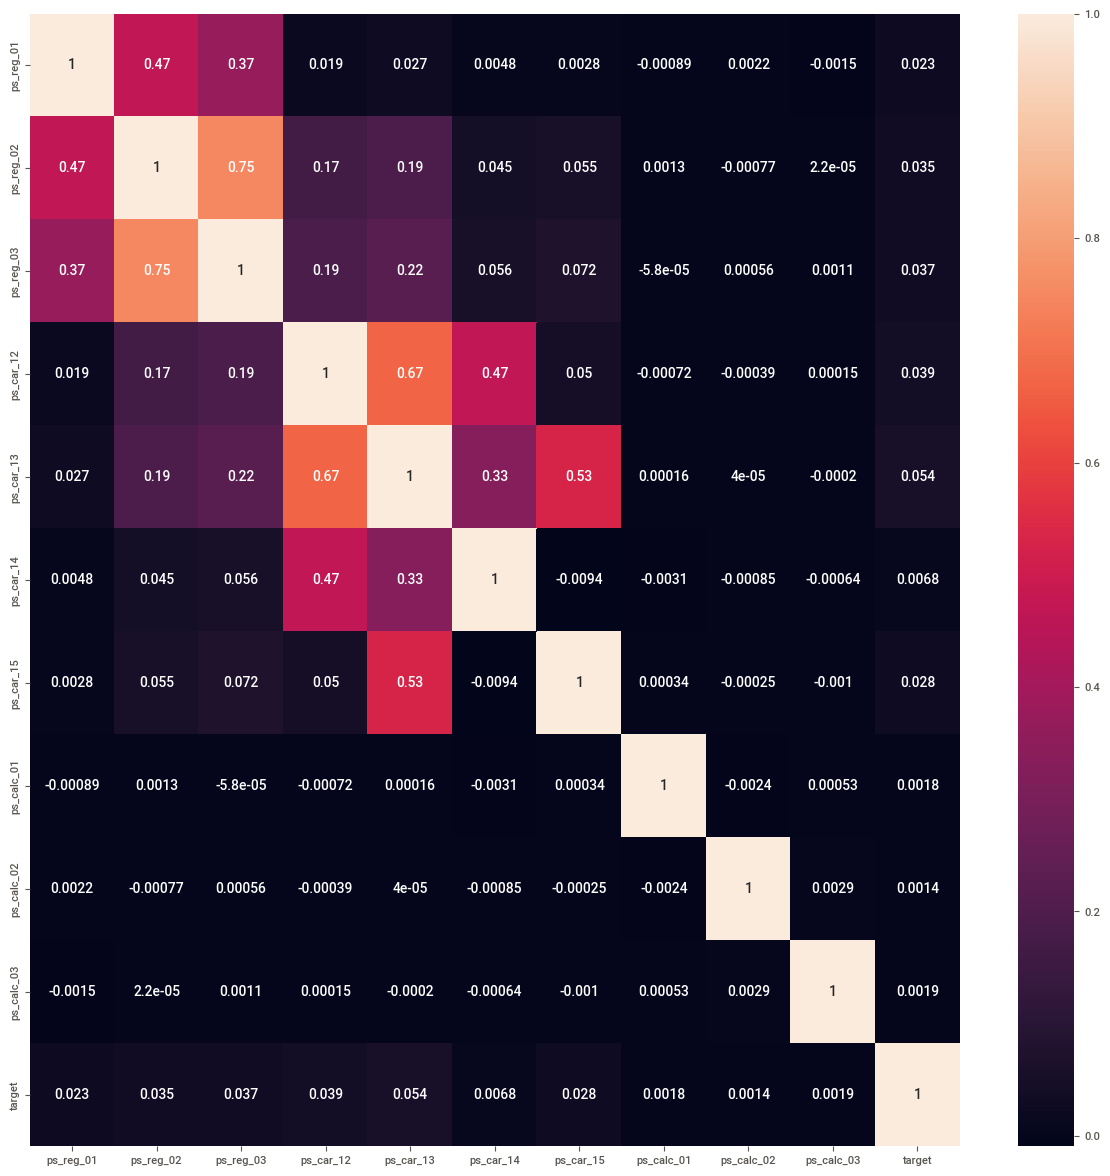

In [ ]:
#finding out the correlation
data_int_corr=data[data_interval]
data_int_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_int_corr.corr(),annot=True)
plt.show()


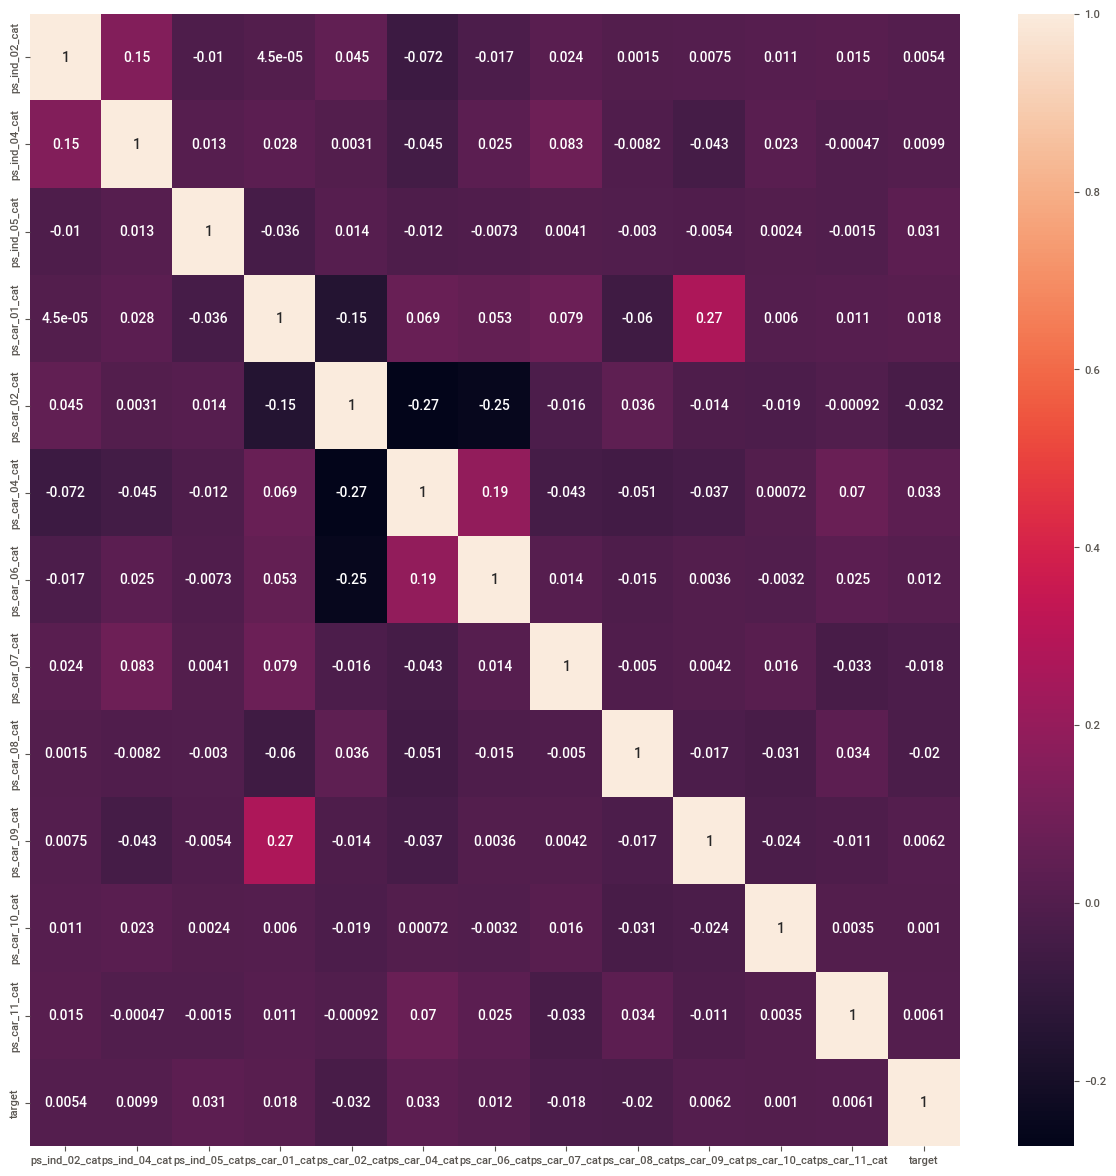

In [ ]:
data_nom_corr=data[data_nominal]
data_nom_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_nom_corr.corr(),annot=True)
plt.show()

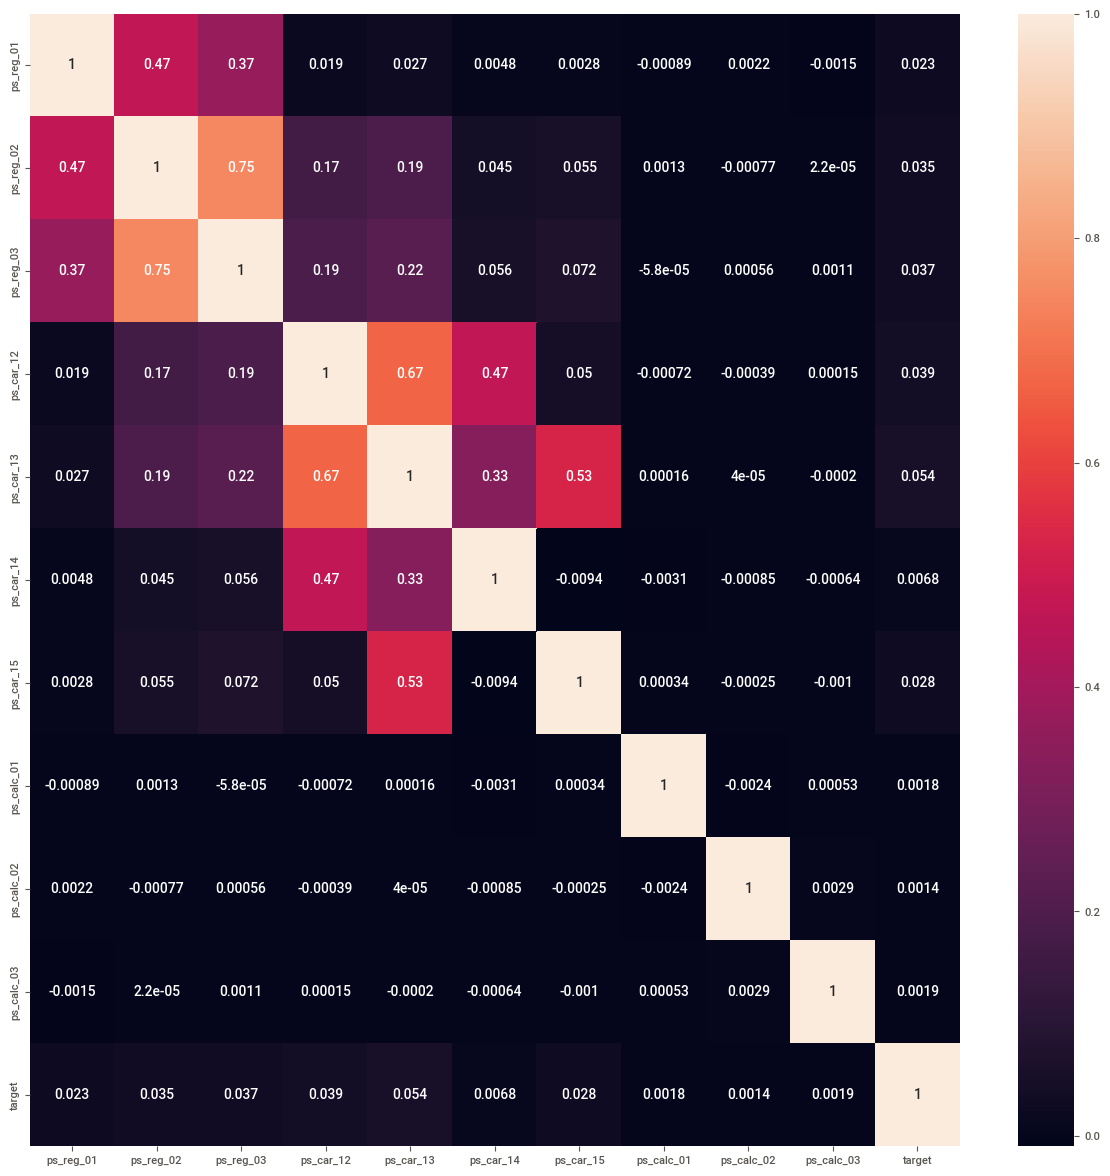

In [ ]:
data_bin_corr=data[data_interval]
data_bin_corr['target']=data['target']
plt.figure(figsize=(15,15))
sns.heatmap(data_bin_corr.corr(),annot=True)
plt.show()

After performing the Univariate and Bivariate analysis, there are no features that are most highly correlated with the target variable(over 0.9). Also, there are some featues which are less correlated with target variable.

ps_car_12, ps_car_10_cat, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, these featues have standard deviation less than 0.1

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
#Not scaling the data because of not using distance based algorithms which requires scaling.

## Model 1: Logistic Regression

In [23]:
X=data.drop(['id','target'],axis=1)
y=data['target']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_test_pred=lr.predict(X_test)

In [27]:
accuracy_score(y_test,y_test_pred)

0.9631645707853465

In [28]:
y_train_pred=lr.predict(X_train)

In [29]:

accuracy_score(y_train,y_train_pred)

0.9636494605906727

Model 1 is giving 96 percent accuracy on train & test data. However, as the data is biased, it is ideal to balance the target data and create a new model.

In [ ]:
X=data.drop(['id','target',"ps_car_12",'ps_car_10_cat','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'],axis=1)
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_test_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
y_train_pred=lr.predict(X_train)
print(accuracy_score(y_train,y_train_pred))

0.9631645707853465
0.9636494605906727


#dropping the featues with standard deviation less than 0.1 did not improve the accuracy

In [ ]:
#as the target data is biased, let us balance the target data and applying the algorithm

In [30]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 573518, 1: 21694})
Counter({0: 573518, 1: 573518})


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [32]:
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_test_pred=lr.predict(X_test)

In [34]:
accuracy_score(y_test,y_test_pred)

0.8633831426977263

In [35]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87    114915
           1       0.89      0.83      0.86    114493

    accuracy                           0.86    229408
   macro avg       0.86      0.86      0.86    229408
weighted avg       0.86      0.86      0.86    229408



In [ ]:
pd.crosstab(y_test,y_test_pred)

col_0,0,1
target,,
0,102493,12422
1,19558,94935


Accuracy of model 1 is dropped to 86 percent after balancing the data. Hence, this model appears to be not very efficient.

## Model 2: Decision Tree

In [ ]:
#model number2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_hat=dt.predict(X_test)
accuracy_score(y_test,y_test_hat)

0.9428529083554191

In [ ]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    114915
           1       0.93      0.96      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [ ]:
y_train_hat=dt.predict(X_train)

In [ ]:
accuracy_score(y_train,y_train_hat)

1.0

In [ ]:
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    458603
           1       1.00      1.00      1.00    459025

    accuracy                           1.00    917628
   macro avg       1.00      1.00      1.00    917628
weighted avg       1.00      1.00      1.00    917628



In [ ]:
#from sklearn import tree
#plt.figure(figsize=(20,14))
#tree.plot_tree(dt,filled=True,fontsize=14)


In [ ]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    114915
           1       0.93      0.96      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [ ]:
pd.crosstab(y_test,y_test_hat)

col_0,0,1
target,,
0,106874,8041
1,5069,109424


**Model 2, Decision Tree is overfitting as the accuracy of train data is 100 percent and the accuracy on test data is 94 percent.**

In [ ]:
X=data.drop(['id','target',"ps_car_12",'ps_car_10_cat','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'],axis=1)
y=data['target']
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_hat=dt.predict(X_test)
print(accuracy_score(y_test,y_test_hat))
y_train_hat=dt.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

Counter({0: 573518, 1: 21694})
Counter({0: 573518, 1: 573518})
0.9432234272562422
1.0


# Removing the features with less standard deviation did not impact the performance

#Hyperparameter tuning
Performing the hyperparameter turning to deal with overfitting and improve the model efficiency

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = RandomizedSearchCV(tree_clf, params, n_jobs=-1, cv=5)

In [ ]:
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 19, 'criterion': 'entropy'})


In [ ]:
#Bestparamters: ({'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})
Bestparamters: ({'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 18, 'criterion': 'entropy'})



In [ ]:
tree_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_depth': 19,
 'criterion': 'entropy'}

In [ ]:
tree_cv.best_score_

0.939599707901723

In [ ]:
dt1=DecisionTreeClassifier(splitter= 'best',
 min_samples_split=2,
 min_samples_leaf=6,
 max_depth=19,
 criterion= 'entropy')

In [ ]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=6)

In [ ]:
y_test_hat=dt1.predict(X_test)

In [ ]:
accuracy_score(y_test_hat,y_test)

0.9414013460733714

In [ ]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94    114915
           1       0.95      0.93      0.94    114493

    accuracy                           0.94    229408
   macro avg       0.94      0.94      0.94    229408
weighted avg       0.94      0.94      0.94    229408



In [ ]:
y_train_hat=dt1.predict(X_train)

In [ ]:
print(classification_report(y_train,y_train_hat))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    458603
           1       0.97      0.94      0.96    459025

    accuracy                           0.96    917628
   macro avg       0.96      0.96      0.96    917628
weighted avg       0.96      0.96      0.96    917628



**After performing the hyperparameter tuning, train accuracy is dropped to 96 percent. Hence, the model is optimal and efficient now.**

In [ ]:
#model 3 applying random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_test_predict=rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_predict)

0.9776468126656438

In [ ]:
y_train_predict=rf_clf.predict(X_train)

In [ ]:
accuracy_score(y_train,y_train_predict)

0.9999956409351066

**Test accuracy of Random forest is 97 percent and train accuracy of Random forest is 99 percent. However, computational power is not sufficient to perform the hyper parameter turning to make the model mode efficient.
Hence, sticking with the Decision Tree model, as it is providing better accuracy, time-efficiency, and easy interpretability.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})")##printing  best parameters



Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
rf_clf2 = RandomForestClassifier(rf_best_params)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training
y_predict=rf_clf2.predict(X_test)#testing
f1_score=f1_score(y_test,y_predict)#checking performance